## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. Export data to CSV file

### 1. Importing libraries and data and renaming columns

In [380]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [381]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [382]:
path = r'C:\Users\Barb\19-09-2024 Gun Violence Data'

In [383]:
#Import the gun violence data from 6-3

df_gun = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-4.csv'), index_col = 0)

In [384]:
df_gun.shape

(239677, 9)

In [385]:
df_gun.head()

,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_gender
0,2013-01-01,Pennsylvania,0,4,NaN,NaN,1.0,0::20,0::Male||1::Male||3::Male||4::Female
1,2013-01-01,California,1,3,NaN,NaN,1.0,0::20,0::Male
2,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male
3,2013-01-05,Colorado,4,0,NaN,NaN,1.0,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male
4,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female


In [386]:
df_gun.dtypes

date                   object
state                  object
n_killed                int64
n_injured               int64
gun_stolen             object
gun_type               object
n_guns_involved       float64
participant_age        object
participant_gender     object
dtype: object

In [387]:
#Make the date "datetime" data type

In [388]:
#df_gun['date'] = pd.to_datetime(df_gun['date'])

In [389]:
df_gun.dtypes

date                   object
state                  object
n_killed                int64
n_injured               int64
gun_stolen             object
gun_type               object
n_guns_involved       float64
participant_age        object
participant_gender     object
dtype: object

In [390]:
#remove all categorical data except 'date' and 'state'

In [391]:
df_gun_dropmost = df_gun.drop(columns=['date','state','gun_stolen','gun_type','participant_age','participant_gender'], axis=1)

In [392]:
df_gun_dropmost.dtypes

n_killed             int64
n_injured            int64
n_guns_involved    float64
dtype: object

### 2. The elbow technique

In [394]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [395]:
score = [kmeans[i].fit(df_gun_dropmost).score(df_gun_dropmost) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3269935.067905091,
 -1356478.8374083133,
 -748139.2608162251,
 -485477.0225558295,
 -395465.3390310437,
 -382985.6367038634,
 -278306.88339943206,
 -206674.85548475897,
 -187853.5556265538]

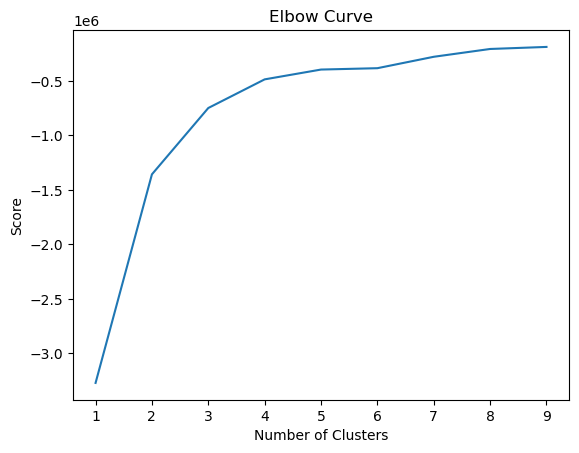

In [396]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from 1-2 and 2-3 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 3.

### 3. k-means clustering

In [399]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [400]:
# Fit the k-means object to the data.

kmeans.fit(df_gun_dropmost)

KMeans(n_clusters=3)

In [401]:
df_gun_dropmost['clusters'] = kmeans.fit_predict(df_gun_dropmost)

In [402]:
df_gun_dropmost.head(20)

,n_killed,n_injured,n_guns_involved,clusters
0,0,4,1.0,0
1,1,3,1.0,0
2,1,3,2.0,0
3,4,0,1.0,0
4,2,2,2.0,0
5,4,0,1.0,0
6,5,0,2.0,0
7,0,5,1.0,0
8,0,4,1.0,0
9,1,6,1.0,0


In [403]:
df_gun_dropmost['clusters'].value_counts()

clusters
0    239605
2        56
1        16
Name: count, dtype: int64

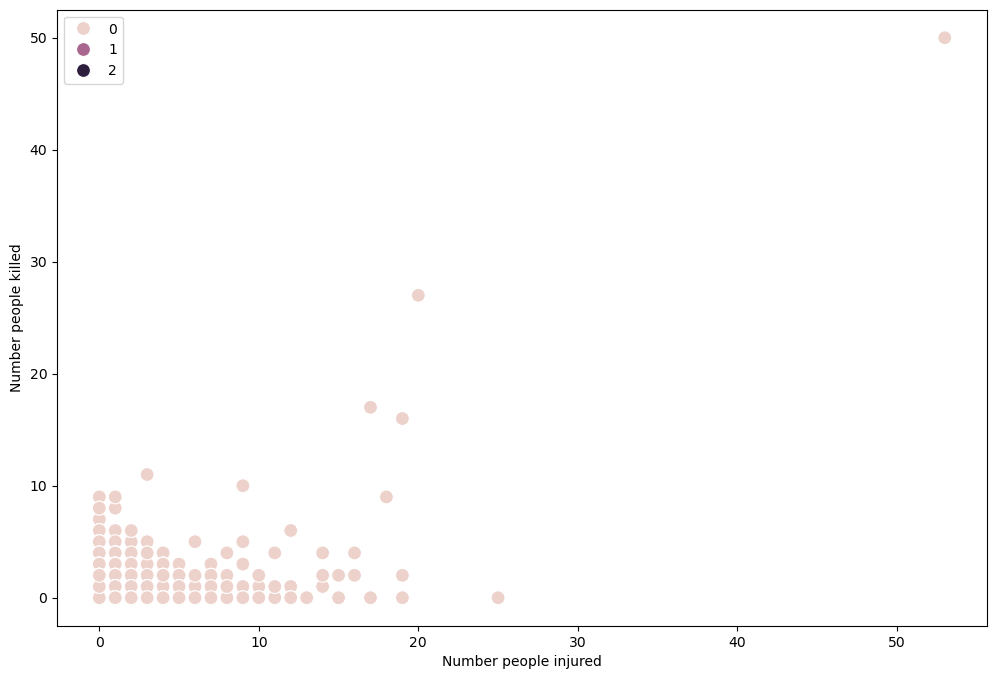

In [404]:
# Plot the clusters for the "n_killed" and "n_injured" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gun_dropmost['n_injured'], y=df_gun_dropmost['n_killed'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number people injured') # Label x-axis.
plt.ylabel('Number people killed') # Label y-axis.
plt.show()

##### This scatterplot shows only 1 cluster (pink = '0')

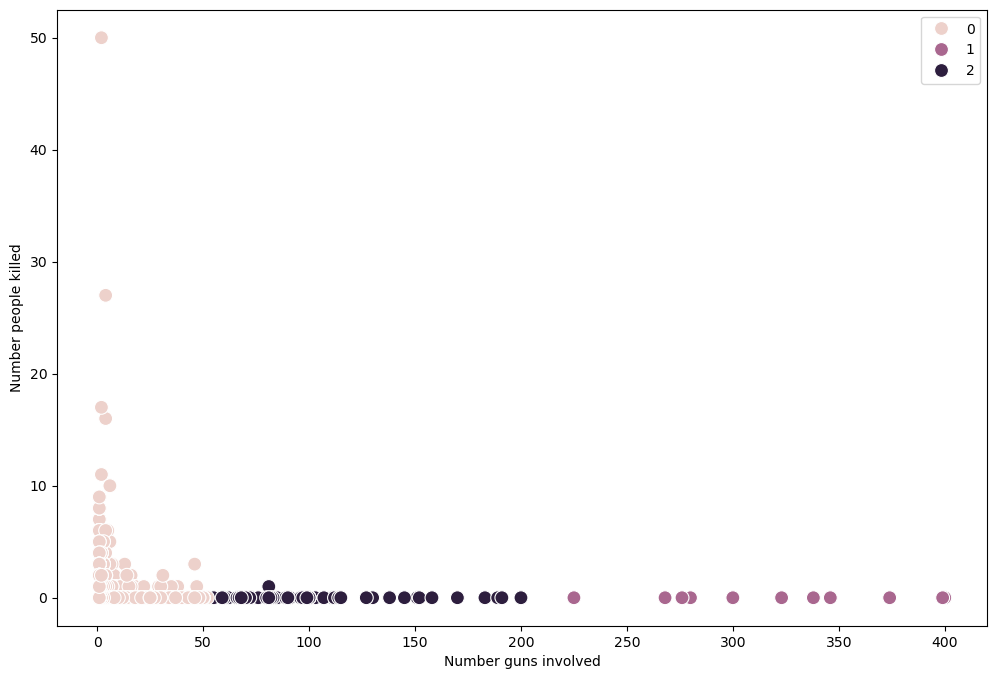

In [406]:
# Plot the clusters for the "n_guns_involved" and "n_killed" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_gun_dropmost['n_guns_involved'], y=df_gun_dropmost['n_killed'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number guns involved') 
plt.ylabel('Number people killed') 
plt.show()

##### The scatterplot shows that fewer people were killed when more guns were involved in gun violence. This doesn't make sense, though.

In [408]:
df_gun_dropmost.loc[df_gun_dropmost['clusters'] == 2, 'cluster_color'] = 'dark purple'
df_gun_dropmost.loc[df_gun_dropmost['clusters'] == 1, 'cluster_color'] = 'purple'
df_gun_dropmost.loc[df_gun_dropmost['clusters'] == 0, 'cluster_color'] = 'pink'

In [410]:
df_gun_dropmost.groupby('cluster_color').agg({'n_guns_involved':['mean', 'median'], 
                         'n_injured':['mean', 'median'],
                          'n_killed':['mean', 'median']})

n_guns_involved        n_injured         n_killed       
                         mean median      mean median      mean median
cluster_color                                                         
dark purple        105.303571   97.5  0.000000    0.0  0.017857    0.0
pink                 1.171415    1.0  0.494155    0.0  0.252361    0.0
purple             333.062500  330.5  0.000000    0.0  0.000000    0.0

##### With these results, one could further analyze why so many guns were used at times. Maybe the more guns involved, the greater the threat that the
##### guns posed. So, the guns were not fired as often because the victim was less likely to resist.

In [413]:
df_gun_dropmost.head()

,n_killed,n_injured,n_guns_involved,clusters,cluster_color
0,0,4,1.0,0,pink
1,1,3,1.0,0,pink
2,1,3,2.0,0,pink
3,4,0,1.0,0,pink
4,2,2,2.0,0,pink


In [415]:
df_gun_clusters = df_gun_dropmost['clusters']

In [417]:
df_gun_clusters.head()

0    0
1    0
2    0
3    0
4    0
Name: clusters, dtype: int32

In [419]:
df_gun_dropmost['state'] = df_gun['state']

In [421]:
df_gun_dropmost.head()

,n_killed,n_injured,n_guns_involved,clusters,cluster_color,state
0,0,4,1.0,0,pink,Pennsylvania
1,1,3,1.0,0,pink,California
2,1,3,2.0,0,pink,Ohio
3,4,0,1.0,0,pink,Colorado
4,2,2,2.0,0,pink,North Carolina


### 4. Exporting this dataframe subset as a CSV file

In [424]:
df_gun = df_gun_dropmost

In [428]:
# Check shape before exporting
df_gun.shape

(239677, 6)

In [430]:
#Check
df_gun.head()

,n_killed,n_injured,n_guns_involved,clusters,cluster_color,state
0,0,4,1.0,0,pink,Pennsylvania
1,1,3,1.0,0,pink,California
2,1,3,2.0,0,pink,Ohio
3,4,0,1.0,0,pink,Colorado
4,2,2,2.0,0,pink,North Carolina


In [432]:
#Export the updated dataframe as a csv file
df_gun.to_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-5New.csv'))